# Regression test using 1D Convolution Neural Network

This notebook shows how to use one dimension Convolutional Neural Netorks to perform regression test on two variables. 

The independent variable *x* and the dependent variable *y*

First we import the necessary libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from collections import OrderedDict,Counter

Let's generate a random sample of 300 points using `torch.randn`.

*y* is then calculated from *x* values using any equation you want. Here i'm using the below.

And plot x,y

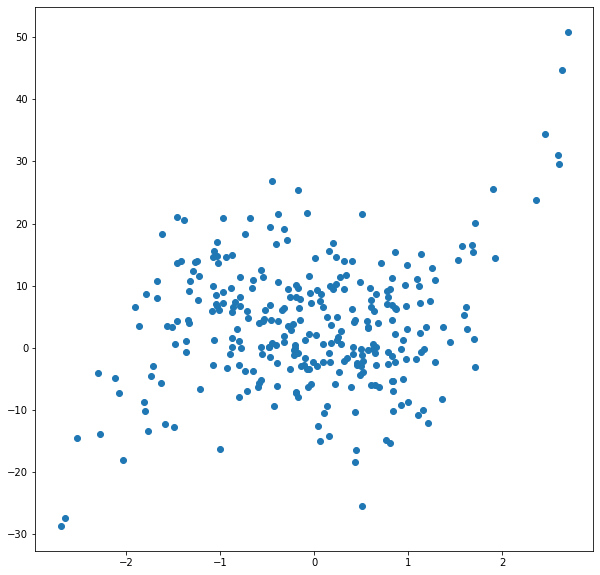

In [2]:
x = torch.randn(300)
y = 2.5 * x**3 + x**2 - 5* x + 3 + 8.5 * torch.randn(300)

plt.figure(figsize=(10,10))
plt.scatter(x,y)

## CNN

Let's build the Deep Neural Network using the below method:
1. Define a sequential model
2. Add two `Conv1d` layers
3. Batch normalize them
4. Use Sigmoid as an activation function for the hidden and input layers
5. Maxpool the convolutional outcome
6. Flatten the outcome into a single Linear layer
7. The model spits out 1 prediction

In [3]:
class Net1(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(OrderedDict([('conv1',nn.Conv1d(1,10,1,bias=False)),
                                                ('bn1',nn.BatchNorm1d(10)),
                                                ('act1',nn.Sigmoid()),
                                                ('conv2',nn.Conv1d(10,100,1,bias=False)),
                                                ('bn2',nn.BatchNorm1d(100)),
                                                ('act1',nn.Sigmoid()),
                                                ('avgpool',nn.AdaptiveMaxPool1d(1)),
                                                ('flat',nn.Flatten())
                                               ]))
        self.layer3 = nn.Linear(in_features=100,out_features=1,bias=True)
        
    def forward(self,x):
        x = self.model(x)
        x = self.layer3(x)
        return x
    
    #Define learning function 
    def learn(self,epochs,x,y,lr):
        loss_fun = nn.MSELoss()
        optimizer = torch.optim.SGD(self.parameters(),lr=lr,momentum=0.9,weight_decay=1e-5)
        losses = []
        for epoch in range(epochs):
            optimizer.zero_grad()
            output = self(x)
            loss = loss_fun(output,y)
            losses.append(loss.item())
            loss.backward()
            if epoch%(epochs/20)==0: print("epoch:{} loss: {}".format(epoch,round(loss.item(),8)))
            optimizer.step()
        return losses
    
    @torch.no_grad()
    def predict(self,x):
        y = self(x)
        return y
                   

In [4]:
net1 = Net1()

### Adjust input tensor into Conv1d friendly shape

Since the input layer is a convolutional one that takes 3d tensors as input, we need to alter the shape of our input by double squeezing our independent variabes

In [5]:
X = x.unsqueeze(1);X.unsqueeze_(1);X.shape

torch.Size([300, 1, 1])

Let's test the input/output to make sure everything is in order before start the learning process

In [6]:
net1(X).shape

torch.Size([300, 1])

In [7]:
loss1 = net1.learn(100,X,y.view(-1,1),1e-3)

epoch:0 loss: 117.98186493
epoch:5 loss: 115.29853821
epoch:10 loss: 109.58933258
epoch:15 loss: 102.69693756
epoch:20 loss: 89.59843445
epoch:25 loss: 76.91893768
epoch:30 loss: 72.97693634
epoch:35 loss: 72.6548996
epoch:40 loss: 72.48652649
epoch:45 loss: 71.65087128
epoch:50 loss: 70.8133316
epoch:55 loss: 70.71881866
epoch:60 loss: 71.89112091
epoch:65 loss: 72.93731689
epoch:70 loss: 71.15735626
epoch:75 loss: 70.31985474
epoch:80 loss: 70.10855103
epoch:85 loss: 69.87658691
epoch:90 loss: 69.58139038
epoch:95 loss: 69.33660126


Text(0, 0.5, 'Losses')

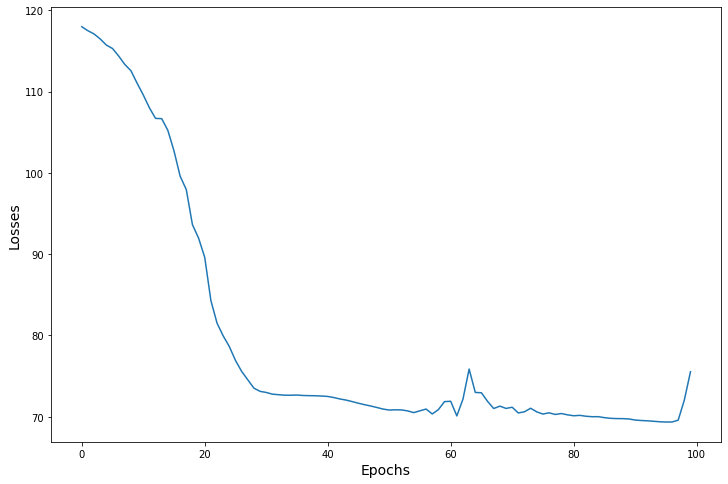

In [8]:
plt.figure(figsize=(12,8))
plt.plot(loss1)
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Losses',fontsize=14)

In [9]:
with torch.no_grad():
    y_hat1 = net1(X) #The predictions

In [10]:
y_hat1.shape

torch.Size([300, 1])

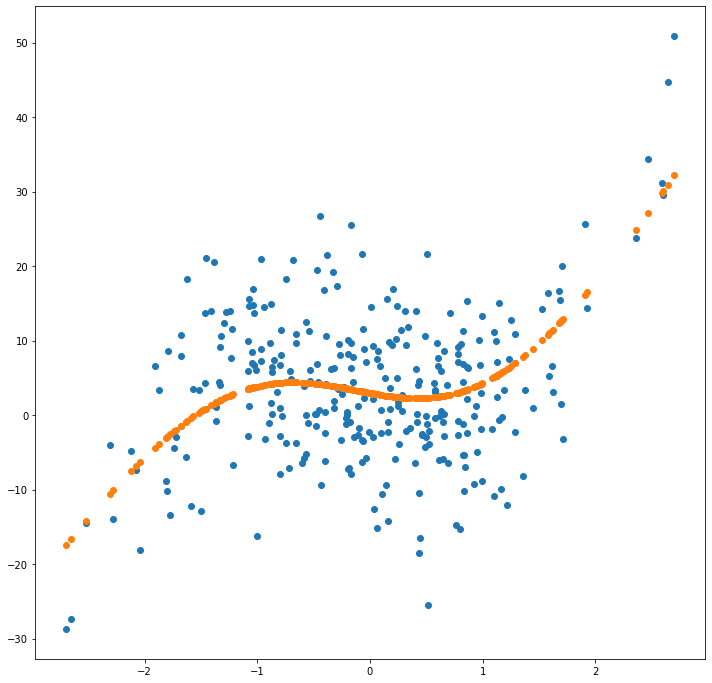

In [11]:
plt.figure(figsize=(12,12))
plt.scatter(x,y)
plt.scatter(X,y_hat1.detach())